# Dynamical evolution of dark energy with CPL parameterization

<>:68: SyntaxWarning: invalid escape sequence '\O'
<>:68: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_149663/3787376157.py:68: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel("Density Fraction $\Omega_i(z)$", fontsize=13, fontweight="bold")


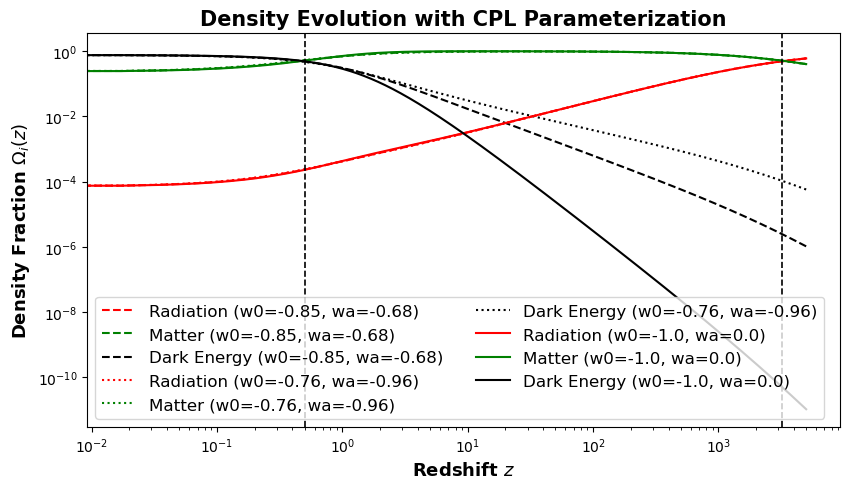

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
H0 = 67.4  # Hubble constant in km/s/Mpc
Omega_r0 = 9.2e-5  # Radiation density parameter at z=0
Omega_m0 = 0.308  # Matter density parameter at z=0

# CPL parameterization for w(a)
def w_DE(a, w0, wa):
    return w0 + wa * (1 - a)

# Dark energy density evolution
def rho_DE(a, w0, wa):
    integrand = lambda a_prime: (1 + w_DE(a_prime, w0, wa)) / a_prime
    integral, _ = quad(integrand, a, 1.0)  # Integrate from a to 1 (today)
    return np.exp(-3 * integral)

# Radiation and matter density evolution
def rho_r(a):
    return Omega_r0 / a**4

def rho_m(a):
    return Omega_m0 / a**3

# Scale factor range (logarithmic spacing for better resolution at high z)
a_values = np.logspace(-3.7, 0, 500)  # Scale factor from a=1e-3 to a=1

# Choose CPL parameters for dark energy (standard cosmology model CC is added as the third case)
w0_values = [-0.85, -0.76, -1.0]  # Three different w0 values
wa_values = [-0.68, -0.96, 0.0]  # Three different wa values
line_styles = ["--", "dotted", "-"]  # Dashed for first case, dotted for second case and solid for the CC case

# Create the plot
plt.figure(figsize=(9, 5))

for (w0, wa, line_style) in zip(w0_values, wa_values, line_styles):
    Omega_r_values = []
    Omega_m_values = []
    Omega_DE_values = []
    
    for a in a_values:
        # Compute unnormalized densities
        rho_r_val = rho_r(a)
        rho_m_val = rho_m(a)
        rho_DE_val = rho_DE(a, w0, wa)
        
        # Compute the total density
        rho_tot = rho_r_val + rho_m_val + rho_DE_val
        
        # Normalize densities
        Omega_r_values.append(rho_r_val / rho_tot)
        Omega_m_values.append(rho_m_val / rho_tot)
        Omega_DE_values.append(rho_DE_val / rho_tot)
    
    # Plot the evolution of each component for the current (w0, wa)
    plt.plot(1 / a_values - 1, Omega_r_values, label=f"Radiation (w0={w0}, wa={wa})", linestyle=line_style, color="red")
    plt.plot(1 / a_values - 1, Omega_m_values, label=f"Matter (w0={w0}, wa={wa})", linestyle=line_style, color="green")
    plt.plot(1 / a_values - 1, Omega_DE_values, label=f"Dark Energy (w0={w0}, wa={wa})", linestyle=line_style, color="black")

plt.xscale("log")
plt.yscale("log")
plt.axvline(3200, color='black', linestyle='--', linewidth=1.2)
plt.axvline(0.5, color='black', linestyle='--', linewidth=1.2)
plt.xlabel("Redshift $z$", fontsize=13, fontweight="bold")
plt.ylabel("Density Fraction $\Omega_i(z)$", fontsize=13, fontweight="bold")
plt.title("Density Evolution with CPL Parameterization", fontsize=15, fontweight="bold")
plt.legend(fontsize=12, loc="best", ncol=2)
#plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('denistyevolution.png')
plt.show()


# X factor to solve the Hubble tension

<>:53: SyntaxWarning: invalid escape sequence '\O'
<>:53: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_149663/4171527787.py:53: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel("$\Omega_X^{(0)}$", fontsize=16, fontweight='bold', labelpad=13)
/tmp/ipykernel_149663/4171527787.py:43: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  Omega_X = fsolve(residual, x0=0.01, args=(w_X, H_z1100, H0_SNe, z_lss))[0]


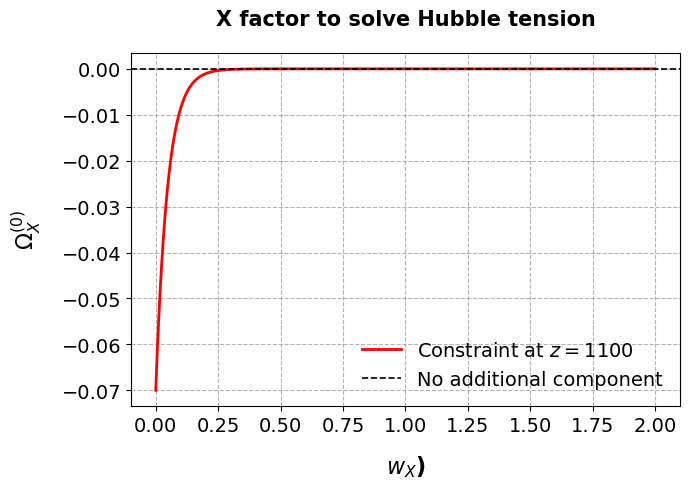

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad

# Constants
H0_Planck = 67.4  # Planck H_0 in km/s/Mpc
H0_SNe = 74.03    # Supernova H_0 in km/s/Mpc
H_z1100 = 1.57537e6  # Hubble parameter at z=1100 from Planck (km/s/Mpc)
z_lss = 1100       # Last scattering surface redshift
c = 299792.458     # Speed of light in km/s

# Density parameters (Planck ΛCDM)
Omega_r0 = 9.2e-5  # Radiation density
Omega_m0 = 0.308   # Matter density
Omega_DE0 = 0.692  # Dark energy density
w_DE = -1          # Dark energy equation of state (cosmological constant)

# Integral for evolution of energy density components
def energy_evolution(w, z):
    integrand = lambda z_prime: (1 + w) / (1 + z_prime)
    integral, _ = quad(integrand, 0, z)
    return np.exp(3 * integral)

# Residual function for Omega_X
def residual(Omega_X, w_X, target_H, H0, z):
    H0_scaled = H0
    H2 = H0_scaled**2 * (
        Omega_r0 * (1 + z)**4 +
        Omega_m0 * (1 + z)**3 +
        Omega_DE0 * energy_evolution(w_DE, z) +
        Omega_X * energy_evolution(w_X, z)
    )
    return H2 - (target_H)**2

# Range of w_X values
w_X_range = np.linspace(0, 2, 1000)
Omega_X_values = []

# Solve for Omega_X for each w_X
for w_X in w_X_range:
    # Use H(z=1100) as the constraint to solve for Omega_X
    Omega_X = fsolve(residual, x0=0.01, args=(w_X, H_z1100, H0_SNe, z_lss))[0]
    Omega_X_values.append(Omega_X)

plt.figure(figsize=(7, 5))
plt.plot(w_X_range, Omega_X_values, label="Constraint at $z=1100$", color='red', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1.2, label="No additional component")
plt.xlabel("$w_X$", fontsize=16, fontweight='bold', labelpad=13)
plt.ylabel("$\Omega_X^{(0)}$", fontsize=16, fontweight='bold', labelpad=13)
plt.title("X factor to solve Hubble tension", fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=14, loc='lower right', frameon=False)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
#plt.savefig('denistyevolution.png')
plt.show()
